In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import ast

In [220]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titles.csv")
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


In [221]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [222]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [223]:
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,crime,US,NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,drama,NG,NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,music,NaN,NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,family,NG,NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,thriller,NaN,NaN,tt10168094,6.2,9.0,2.186,NaN


In [224]:
df.sort_values(['release_year', 'imdb_score'], ascending=False)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5059,ts296563,Who Rules The World,SHOW,A legendary wuxia romance that focuses on the ...,2022,TV-PG,44,drama,CN,1.0,tt14950036,9.2,81.0,57.401,8.7
4832,ts217231,Heartstopper,SHOW,Teens Charlie and Nick discover their unlikely...,2022,TV-14,28,drama,GB,1.0,tt10638036,8.9,28978.0,926.362,8.9
4965,ts302363,Twenty Five Twenty One,SHOW,The dreams of two young people are crushed by ...,2022,TV-14,76,romance,KR,1.0,tt17513352,8.7,4081.0,76.371,8.6
4938,ts321513,My Liberation Notes,SHOW,"Three siblings, exhausted by the monotony of d...",2022,TV-14,62,drama,KR,1.0,tt15146130,8.4,276.0,62.434,8.0
5573,ts310628,MaveriX,SHOW,Six young motocross riders come together to fo...,2022,NaN,23,sport,AU,1.0,tt15373864,8.4,31.0,2.880,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,thriller,EG,NaN,tt0049761,6.7,590.0,1.044,5.9
15,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,romance,US,NaN,tt0047673,7.5,42373.0,9.710,7.2
28,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,drama,EG,NaN,tt0044429,7.4,1219.0,1.866,7.0
24,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,crime,EG,NaN,tt0316472,6.8,231.0,1.826,5.8


In [225]:
df.drop(['description', 'seasons'], axis=1, inplace=True)
df.drop(["imdb_id","id"],axis=1,inplace=True)

In [226]:
df.dropna(inplace=True)

In [227]:
df.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

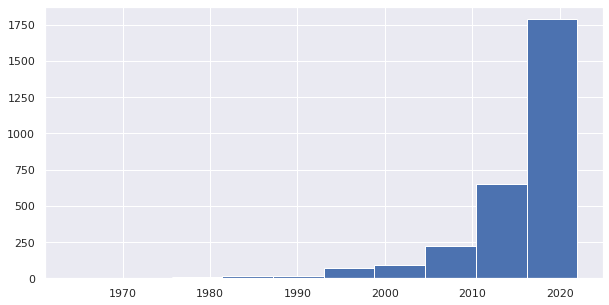

In [228]:
df["release_year"].hist(figsize=(10, 5));

Judging from the histogram above it seems that movies within this dataset started small around the 1950s but then drastically increases in the early 2000s and onwards

In [229]:
certification = df.age_certification.value_counts()

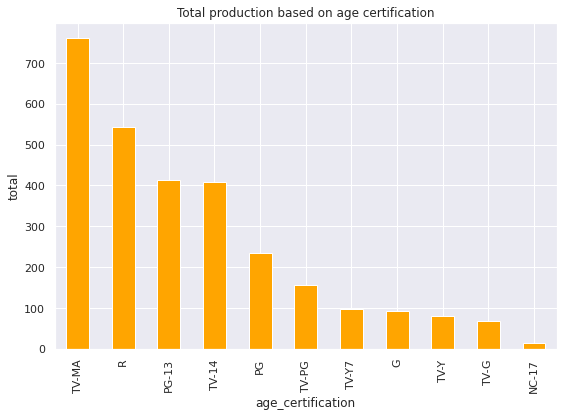

In [230]:
# plotting a bar chart to show the age certification
certification.plot(kind='bar', figsize=(9, 6), color='orange')
plt.title('Total production based on age certification')
plt.xlabel('age_certification')
plt.ylabel('total')
plt.show()

Judging from the histogram above it seems that NC-17(No One 17 and Under Admitted) movies have been watched  more in netflix

Which type of shows are more popular in Netflix?

In [231]:
a=df["type"].value_counts()
a

SHOW     1570
MOVIE    1295
Name: type, dtype: int64

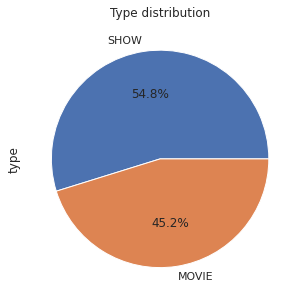

In [232]:
#using matplotlib
a.plot(kind= 'pie', figsize=(10, 5), autopct= '%1.1f%%')
plt.title('Type distribution')
plt.show()

In [233]:
#sns.countplot(x="type", data=df, palette="Set1") using sea born

It seems from the data set TV shows are more popular than Movies

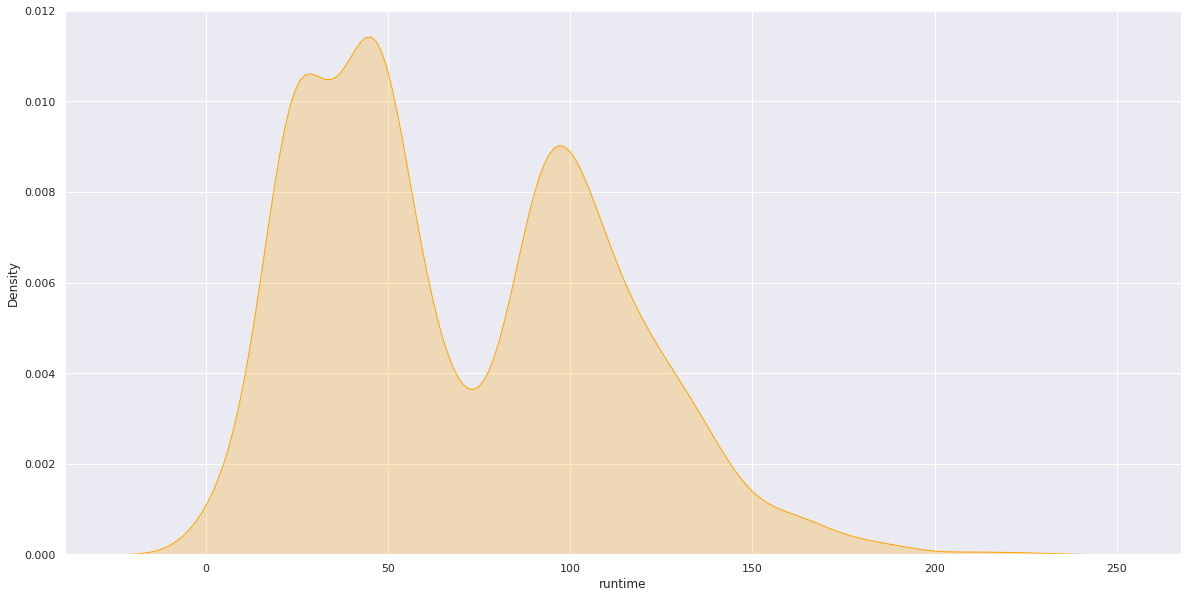

In [234]:
sns.kdeplot(data=df["runtime"], shade=True,color="orange")
#sns.histplot(data=df,x="runtime")

In [235]:
a=df["genres"].value_counts()

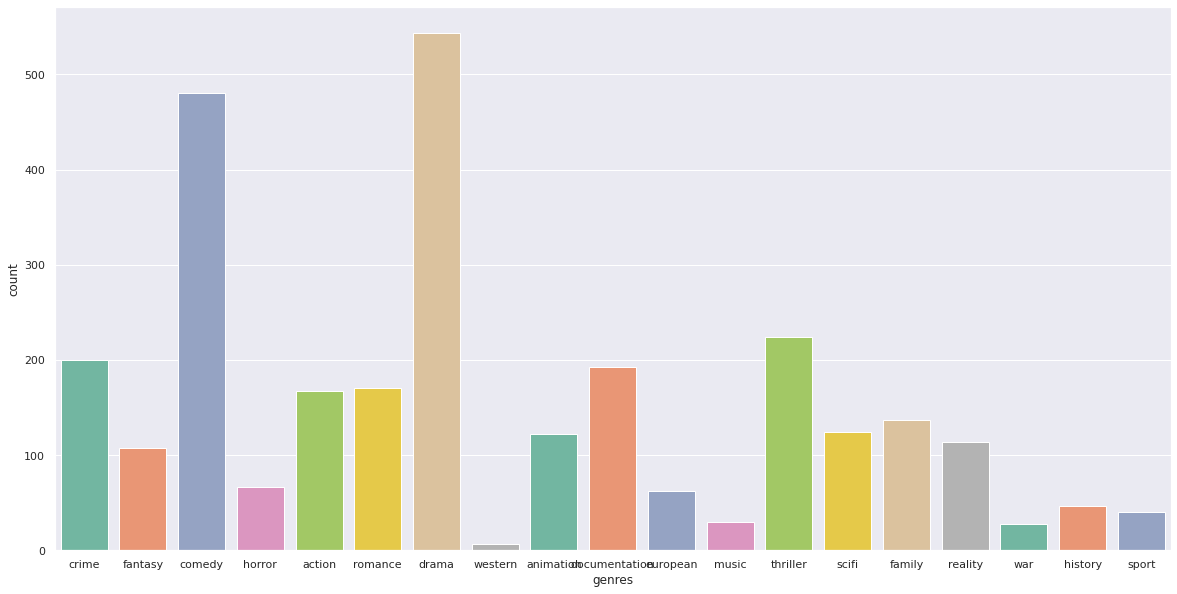

In [236]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.countplot(x="genres",data=df, palette="Set2")
#for p in ax.patches: #to display values in countplot
        #ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

In [237]:
top_10_countries = df.production_countries.value_counts().head(10)

Text(0, 0.5, 'Production count')

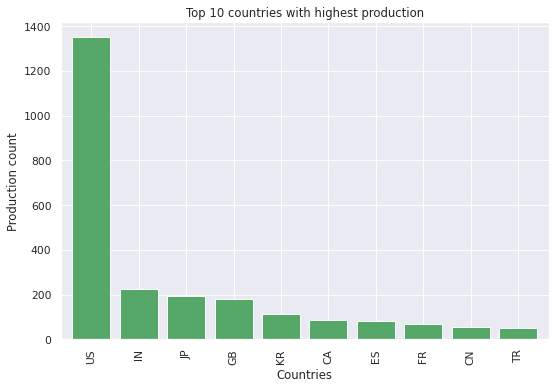

In [238]:
plt.figure(figsize=(20, 10), dpi=70)
top_10_countries.plot(kind = 'bar', width =0.8, figsize=(9, 6), color='g')
plt.title('Top 10 countries with highest production')
plt.xlabel('Countries')
plt.ylabel('Production count')

In [239]:
df2 = df.filter(['genres','imdb_score'], axis=1)
df3=df2.groupby(["genres"]).mean()
df3.sort_values(['imdb_score'], ascending=False,inplace=True)
df3

,imdb_score
genres,
western,7.314286
history,7.221277
sport,7.180000
war,7.132143
documentation,7.087047
european,7.058065
music,7.036667
crime,6.969500
drama,6.889522


Text(0, 0.5, 'avg_imdbscore')

<Figure size 1400x700 with 0 Axes>

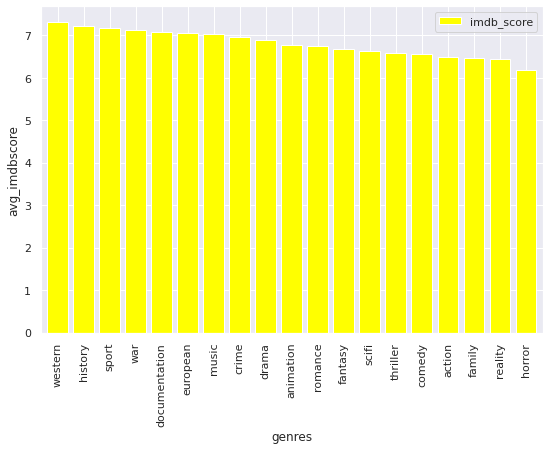

In [240]:
plt.figure(figsize=(20, 10), dpi=70)
ax=df3.plot(kind = 'bar', width =0.8, figsize=(9, 6), color='yellow')
plt.xlabel('genres')
plt.ylabel('avg_imdbscore')

In [241]:
df4 = df.filter(['genres','tmdb_score'], axis=1)
df5=df4.groupby(["genres"]).mean()
df5.sort_values(['tmdb_score'], ascending=False,inplace=True)
df5

,tmdb_score
genres,
sport,7.597500
animation,7.339344
music,7.313333
fantasy,7.300000
scifi,7.235484
family,7.191971
documentation,7.162176
history,7.151064
war,7.125000


Text(0, 0.5, 'avg_tmdbscore')

<Figure size 1400x700 with 0 Axes>

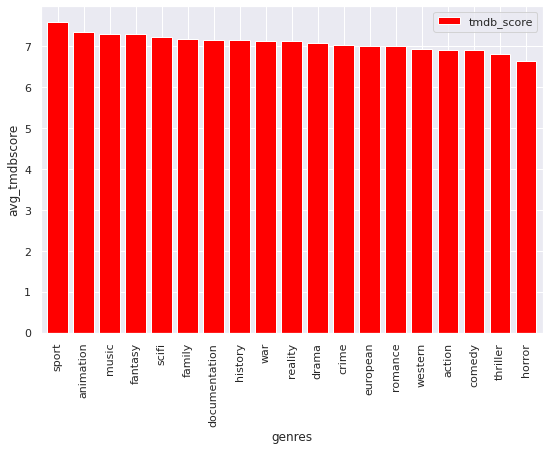

In [242]:
plt.figure(figsize=(20, 10), dpi=70)
df5.plot(kind = 'bar', width =0.8, figsize=(9, 6), color='red')
plt.xlabel('genres')
plt.ylabel('avg_tmdbscore')

In [243]:
# Top 10 movies with highest rating based on tmdb score and popularity
top_10_based_on_tmdb_rating = df.sort_values(['tmdb_score', 'tmdb_popularity'], ascending= False)[['title','tmdb_score','tmdb_popularity', 'type']].head(10)
top_10_based_on_tmdb_rating

,title,tmdb_score,tmdb_popularity,type
1582,The Haunted House,10.0,13.649,SHOW
4228,The Queen and the Conqueror,10.0,7.958,SHOW
1600,Rainbow Ruby,10.0,6.616,SHOW
4645,The Charming Stepmom,10.0,6.550,SHOW
2786,The Unknown Hitman: The Story of El Cholo Adrián,10.0,6.419,SHOW
2194,Rainbow Rangers,10.0,5.692,SHOW
4611,Nailed It! Germany,10.0,3.934,SHOW
4200,The Writer,10.0,3.733,SHOW
5311,Action Pack,10.0,3.669,SHOW
4678,Futmalls.com,10.0,3.412,SHOW


In [244]:
# Top 10 movies with highest rating based on imdb score and votes
top_10_based_on_imdb_rating = df.sort_values(['imdb_score', 'imdb_votes'], ascending= False)[['title','imdb_score','imdb_votes', 'type']].head(10)
top_10_based_on_imdb_rating

,title,imdb_score,imdb_votes,type
243,Breaking Bad,9.5,1727694.0,SHOW
259,Avatar: The Last Airbender,9.3,297336.0,SHOW
3827,Kota Factory,9.3,66985.0,SHOW
3320,Our Planet,9.3,41386.0,SHOW
1422,Reply 1988,9.2,6557.0,SHOW
2057,My Mister,9.2,5481.0,SHOW
5059,Who Rules The World,9.2,81.0,SHOW
4847,Arcane,9.1,175412.0,SHOW
3196,The Last Dance,9.1,108321.0,SHOW
917,Attack on Titan,9.0,325381.0,SHOW
